# Introduction

The given dataset contains the metadata of the books from **bookdepository.com**. The detailed information of the attributes is provided below.
- **authors** : list of authors
- bestseller-rank : Bestseller ranking
- categories : List of all categories (genres)
- description : Description(string)
- dimension-x : Dimension along x axis (float in cms)
- dimension-y : Dimension along y axis (float in cms)
- dimension-z : Dimension along z axis (float in cms)
- edition : Edition (string)
- edition-statement : Edition statement (string)
- for-ages : Ranges of ages 
- format : Format 
- id : Unique Identifier
- illustration-note
- image-checksum : Cover Image checksum
- image-path : Cover image file path
- image-url : Cover image url
- imprint
- index-date : Crawling date 
- isbn10 : ISBN-10
- isbn13 : ISBN-13 
- lang : List of languages of book
- publication-date : Publication date
- publication-place : Publication place
- rating-avg : Rating average (0-5)
- rating-count : Number of ratings 
- title : Book's title 
- url : Relative URL (https://bookdepository.com + url)
- weight : Weight of book in KG

EDA

In [1]:
import pandas as pd

# Load the dataset
data_main = pd.read_csv("D:\\data minning\\data_books\\dataset.csv")
data_a = pd.read_csv("D:\\data minning\\data_books\\authors.csv")
data_c = pd.read_csv("D:\\data minning\\data_books\\categories.csv")
data_f = pd.read_csv("D:\\data minning\\data_books\\formats.csv")
data_p = pd.read_csv("D:\\data minning\\data_books\\places.csv")


In [2]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

data_main.rename(columns={'id' : 'book_id'} , inplace=True)
data_main.columns


Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'book_id',
       'illustrations-note', 'image-checksum', 'image-path', 'image-url',
       'imprint', 'index-date', 'isbn10', 'isbn13', 'lang', 'publication-date',
       'publication-place', 'rating-avg', 'rating-count', 'title', 'url',
       'weight'],
      dtype='object')

In [3]:
data_main.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [4]:
data_a.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [5]:
data_c.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [6]:
data_f.head()

,format_id,format_name
0,21,Address
1,5,Audio
2,27,Bath
3,44,Big
4,14,Board


In [7]:
data_p.head()

,place_id,place_name


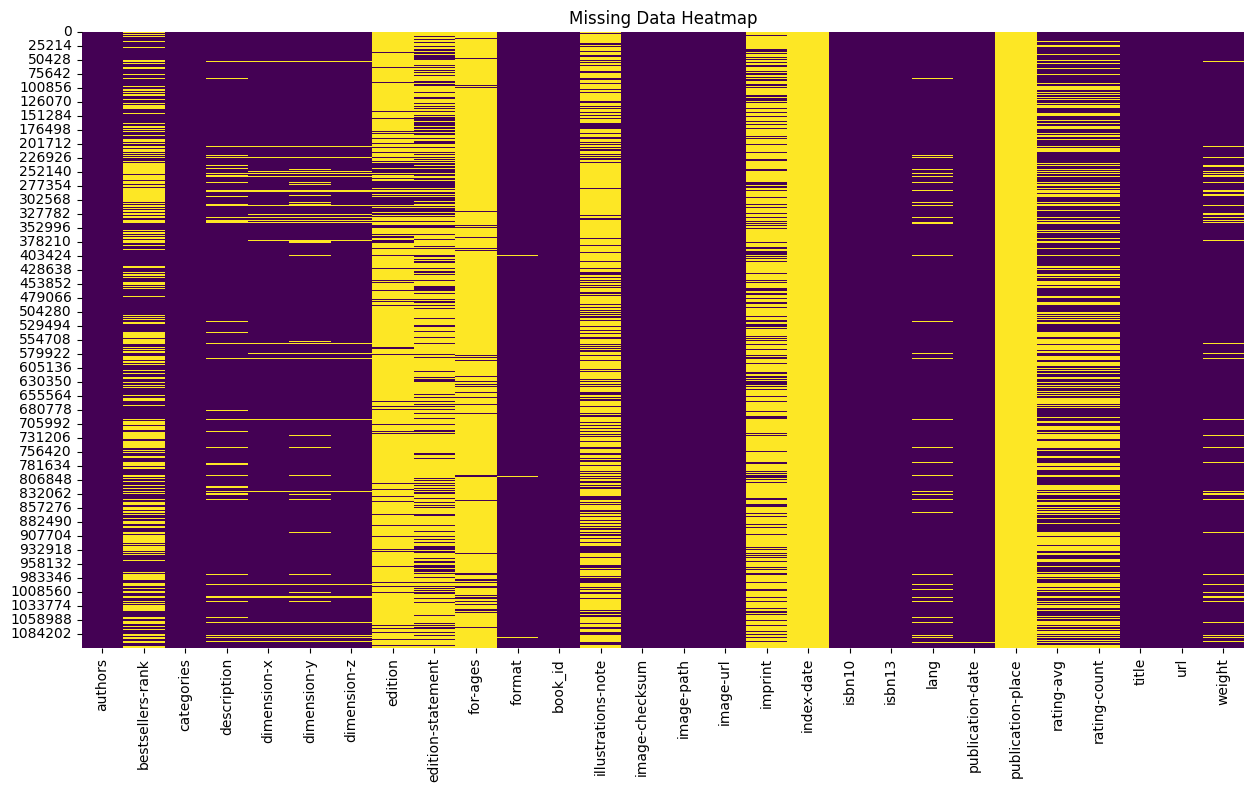

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_main.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [9]:
data_main.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      749037
for-ages              1033390
format                   6622
book_id                     0
illustrations-note     753737
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [10]:
data_main.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
book_id                 int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

In [11]:
data_c.dtypes

category_id       int64
category_name    object
dtype: object

In [12]:
data_a.dtypes

author_id       int64
author_name    object
dtype: object

In [13]:
data_f.dtypes

format_id       int64
format_name    object
dtype: object

In [14]:
data_p.dtypes

place_id      object
place_name    object
dtype: object

**For the classification problem , we can classify books according to their rating avg as(high , medium , low) based on their title and description. So we will extract two attributes  title and description.**

In [15]:
data_main= data_main.dropna(subset=['rating-avg','title','description'])

In [16]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords

In [17]:
# Example: Define rating categories
def categorize_rating(rating):
    if rating >= 4:
        return 'high'
    elif rating >= 3:
        return 'medium'
    else:
        return 'low'

data_main['rating_category'] = data_main['rating-avg'].apply(categorize_rating)


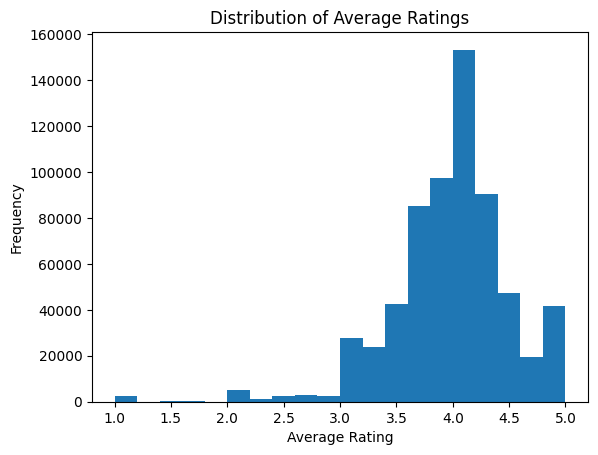

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of book ratings
plt.hist(data_main['rating-avg'], bins=20)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

In [19]:
import nltk
from nltk.corpus import stopwords
# Text preprocessing for 'title' and 'description'
stop_words = set(stopwords.words('english'))

data_main['title'] = data_main['title'].str.lower()
data_main['title'] = data_main['title'].str.replace('[^\w\s]', '')
data_main['title'] = data_main['title'].apply(nltk.word_tokenize)
data_main['title'] = data_main['title'].apply(lambda x: [word for word in x if word not in stop_words])

data_main['description'] = data_main['description'].str.lower()
data_main['description'] = data_main['description'].str.replace('[^\w\s]', '')
data_main['description'] = data_main['description'].apply(nltk.word_tokenize)
data_main['description'] = data_main['description'].apply(lambda x: [word for word in x if word not in stop_words])


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sameer\AppData\Local\Temp\ipykernel_8688\2392435089.py:7: SyntaxWarning: invalid escape sequence '\w'
  data_main['title'] = data_main['title'].str.replace('[^\w\s]', '')
C:\Users\sameer\AppData\Local\Temp\ipykernel_8688\2392435089.py:12: SyntaxWarning: invalid escape sequence '\w'
  data_main['description'] = data_main['description'].str.replace('[^\w\s]', '')


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

title_tfidf = tfidf_vectorizer.fit_transform(data_main['title'].apply(lambda x: ' '.join(x)))
description_tfidf = tfidf_vectorizer.fit_transform(data_main['description'].apply(lambda x: ' '.join(x)))


In [21]:
from scipy.sparse import hstack

X = hstack([title_tfidf, description_tfidf])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, data_main['rating_category'], test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6472006636842228


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report

# Define the logistic regression model
clf = LogisticRegression(max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_clf = LogisticRegression(max_iter=1000, **best_params)
best_clf.fit(X_train, y_train)

# Model evaluation
y_pred = best_clf.predict(X_test)

# Cross-validation
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5, scoring='accuracy')

# Classification report
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Cross-Validation Scores:", cv_scores)
print("Classification Report:\n", classification_rep)



c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Cross-Validation Scores: [0.64066059 0.64021477 0.64187205 0.64113548 0.63978484]
Classification Report:
               precision    recall  f1-score   support

        high       0.67      0.75      0.70     70151
         low       0.59      0.02      0.03      3359
      medium       0.62      0.56      0.59     55467

    accuracy                           0.65    128977
   macro avg       0.62      0.44      0.44    128977
weighted avg       0.64      0.65      0.64    128977

